# 1. Import required libraries and read the data:


In [1]:
#Import the required libraries and read the dataset.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from mlxtend.classifier import StackingCVClassifier
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

import warnings
warnings.filterwarnings("ignore")


#reading the dataset
df=pd.read_csv("C:\\Users\\suhas\\Downloads\\Apps_data+(1).csv")

In [2]:
#Check the first few samples, shape, info of the data and try to familiarize yourself with different features
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
#Shape of the data
df.shape

#There are 10,841 records and 13 columns in total

(10841, 13)

In [4]:
# lets check the basic information about the dataset
df.info()

#Almost all the columns are of object data typ except 'rating' which is of float datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


# 2. Data cleansing and Exploratory data analysis:

In [5]:
#Check summary statistics of the dataset.
df.describe(include=object)

#There are totally 10,841 apps, there are 34 unique categories out of which the category 'FAMILY' is the top category with a
#frequency of 1972 ie 1972 of total apps 1972 apps are family friendly

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


In [6]:
 #List out the columns that need to be worked upon for model building.
    
#(Category,Rating,Reviews,Size,Installs,Content Rating)

In [7]:
#Check the unique categories of the column 'Category', Is there are any invalid category? If yes drop them
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [8]:
#here the category '1.9' seem tobe invalid, hence we drop it
df['Category']=df['Category'].astype('category')
df['Category']=df['Category'].cat.remove_categories(['1.9'])


In [9]:
#Check if there are missing values present in the column Rating, If any? drop them and Convert ratings to high
#and low categories(>3.5 is high rest low) and store it in a new column ‘Rating_category’.

df['Rating'].isnull()
#drop missing values in 'Rating' column
df=df.dropna( how='any',subset=['Rating'])
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9367, dtype: float64

In [10]:
#df['Rating']=[high if rating>3.5 else low for rating in df['Rating']] in a new column ‘Rating_category’.
rating=df['Rating']
df['Rating_category']=['high' if i>3.5 else 'low' for i in rating]
df['Rating_category']


0        high
1        high
2        high
3        high
4        high
         ... 
10834    high
10836    high
10837    high
10839    high
10840    high
Name: Rating_category, Length: 9367, dtype: object

In [11]:
#Check the distribution of the newly created column 'Rating_category' and comment on the distribution
df['Rating_category'].value_counts()

#The are 8471 apps with high ratings anf 896 apps with low ratings

high    8471
low      896
Name: Rating_category, dtype: int64

In [12]:
#Convert the column "Reviews" to numeric datatype and check the presence of outliers in the column and handle the outliers 
#using transformation approach
df['Reviews']=df['Reviews'].replace('3.0M','3000000')
df['Reviews']=df['Reviews'].astype(int)


<AxesSubplot:xlabel='Reviews'>

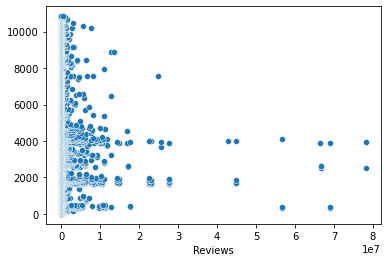

In [13]:
#checking for the preceence f outliers using scatterplot
sns.scatterplot(df['Reviews'],df.index)

In [14]:
#Treating outliers by using logerithemic transformation
df['Reviews']=np.log10(df['Reviews'])
df['Reviews']

0        2.201397
1        2.985426
2        4.942058
3        5.333737
4        2.985426
           ...   
10834    0.845098
10836    1.579784
10837    0.602060
10839    2.056905
10840    5.600218
Name: Reviews, Length: 9367, dtype: float64

In [15]:
#The column 'Size' contains alphanumeric values, handle the non numeric data and convert the column into suitable datatype.
#(hint: Replace M with 1 million and K with 1 thousand, and drop/impute the entries where size='Varies with device').
df['Size']=df['Size'].str.replace('M','1000000')
df['Size']=df['Size'].str.replace('k',"1000")
#dropping 'Varies with device' from 'Size' column
df.drop(df.loc[df['Size']=='Varies with device'].index, inplace=True)

In [16]:
#Check the column 'Installs', handle the unwanted characters and convert the column into suitable dataype
df['Installs']=df['Installs'].str.replace('+',"")
df['Installs']=df['Installs'].str.replace(',',"")

#Removing 'Free' from 'Installs' since it is an outlier
df.drop(df.loc[df['Installs']=='Free'].index, inplace=True)

df['Installs']=df['Installs'].astype(int)

In [17]:
#Check the column 'Price', remove the unwanted characters and convert the column into suitable datatype.
df['Price']=df['Price'].str.replace('$',"")
df['Price']=df['Price'].astype(float)

# 3. Data Preparation for model building:

In [18]:
##Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', 
#since we created a new feature from it (i.e. rating_category) will use that.

df=df.drop(['Rating','App','Type','Price','Genres','Last Updated','Current Ver','Android Ver'],axis=1)




In [19]:
#For the target column 'Rating_category' Replace 'high' as 1 and 'low' as 0.
df['Rating_category'] = df['Rating_category'].replace({'high':1,'low':0})

In [20]:
#Encode the categorical column
df=pd.get_dummies(df,columns=['Category','Content Rating'])
#Changing the datatype of 'Size' from object to float   
df['Size']=df['Size'].astype(float)


In [21]:
#Segregate the target and independent features.
X=df.drop('Rating_category',axis=1)
y=df['Rating_category']

In [22]:
#Split the dataset into train and test.
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.3, random_state = 42)

In [23]:
#Standardize the data, so that the values are within a particular range.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])


# 4. Model training, and testing:

In [24]:
#Write a function to fit and print the model predictions, input parameters would be model, train, and test data.

estimators = [RandomForestClassifier(),KNeighborsClassifier(), DecisionTreeClassifier()]

models=[DecisionTreeClassifier(), RandomForestClassifier(),BaggingClassifier(),GradientBoostingClassifier(),StackingCVClassifier(classifiers = estimators, meta_classifier =DecisionTreeClassifier())]

#Use the above function and train a Decision tree, Random Forest, Bagging, Boosting, and Stacked Classifier models 
#and make predictions on test data and evaluate the models.

model=[]
for model in models:
    print(model.fit(X_train,y_train))
    print('\n',model.score(X_train, y_train))
    print('\n',model.score(X_test, y_test))
  




DecisionTreeClassifier()

 0.9961182994454714

 0.8270806382061233
RandomForestClassifier()

 0.9961182994454714

 0.8852953859422165
BaggingClassifier()

 0.9874306839186692

 0.8633031479085813
GradientBoostingClassifier()

 0.8951940850277265

 0.8930573523070289
StackingCVClassifier(classifiers=[RandomForestClassifier(),
                                  KNeighborsClassifier(),
                                  DecisionTreeClassifier()],
                     meta_classifier=DecisionTreeClassifier())

 0.889463955637708

 0.895644674428633


# 5. Conclusion and improvisation:

In [25]:
#Compare and write your conclusions and steps to be taken in future in order to improve the accuracy of the model.


#This dataset seems to be prone to overfit since its performance on test data is comparitively poor.
#However, among Decision tree, Random Forest, Bagging, Boosting, and Stacked Classifier models
#Gradientboosting and stacking classifiers performed well with accuracy scores of

#GradientBoostingClassifier() 0.8951940850277265 - train data
#                            0.8930573523070289 -  test data

#StackingCVClassifier()     0.889463955637708 - train data
#                           0.895644674428633 -test data 

#In order to avoid overfitting and improve the predictive power of the model following measures can be taken,
#remove unwanted features
#train more data
#regularization
#Stop feeding train data earlier
#Ensemble techniques

#And for this particulr problem where we wanted to predict the ratings using the given features,resulted in overfitting
#and  to avoid it ,the features to be focussed on are Customer  Reviews,Size of the app,Number of user downloads,
#Rating_category ETC insted of using the entire data